# Model fitting and understanding . 
* V2: The operation process is simplified. 

* Turn the warning off: 
~~~~
options(warn=-1)
~~~~
* Turn the warning back on: 
~~~~
options(warn=0)
~~~~
* reference: https://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script

In [1]:
options(warn=-1)

## First step is getting the correlationship between those variables. 

In [2]:
library(rms)
data <- read.csv('J:/EECS6414/process/Pipeline/Data_cleaning/kernel_datassource.csv')# , stringsAsFactors=FALSE

col_name <- names(data)
env_vars <- col_name
vote_num <- data[c("km_votes")]
high_voted <- data[c("high_voted")]
reject_vars <- c(#"kernel_datasets", # because they are all 1, so we can only get NaN. 
                 "kernel", "author", "id", "km_tags", 
                "km_votes", "high_voted",  
                "km_forks", "km_comments", "km_views"
                 #"competition", "organization" # unnecessary variables. 
                 )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
# for (env in env_vars){
#    print(paste(env, "+"))
# }
data <- data[env_vars]

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



In [7]:
env_vars

[1] "km_Hidden"                     "km_Notebook"                  
 [3] "km_null"                       "km_Data"                      
 [5] "km_Visualization"              "km_Other"                     
 [7] "km_language"                   "km_isNotebook"                
 [9] "km_dataSources"                "km_versions"                  
[11] "km_competitions"               "km_competition_size_ttl"      
[13] "km_competition_size_avg"       "km_competition_size_max"      
[15] "km_competition_size_min"       "km_competition_discussion_ttl"
[17] "km_competition_discussion_avg" "km_competition_discussion_max"
[19] "km_competition_discussion_min" "km_competition_competitor_ttl"
[21] "km_competition_competitor_avg" "km_competition_competitor_max"
[23] "km_competition_competitor_min" "km_datasets"                  
[25] "km_dataset_size_ttl"           "km_dataset_size_avg"          
[27] "km_dataset_size_max"           "km_dataset_size_min"          
[29] "km_dataset_discussion_ttl"     "km_dataset_discussion_avg"    
[31] "km_dataset_discussion_max"     "km_dataset_discussion_min"    
[33] "km_dataset_kernel_ttl"         "km_dataset_kernel_avg"        
[35] "km_dataset_kernel_max"         "km_dataset_kernel_min"        
[37] "km_dataset_download_ttl"       "km_dataset_download_avg"      
[39] "km_dataset_download_max"       "km_dataset_download_min"      
[41] "km_dataset_view_ttl"           "km_dataset_view_avg"          
[43] "km_dataset_view_max"           "km_dataset_view_min"          
[45] "km_dataset_vote_ttl"           "km_dataset_vote_avg"          
[47] "km_dataset_vote_max"           "km_dataset_vote_min"          
[49] "km_dataset_version_ttl"        "km_dataset_version_avg"       
[51] "km_dataset_version_max"        "km_dataset_version_min"       
[53] "km_num_of_tags"                "km_tags_te_sum"               
[55] "km_tags_te_avg"                "km_tags_te_max"               
[57] "km_tags_te_min"                "km_tags_te_median"

png 
  2

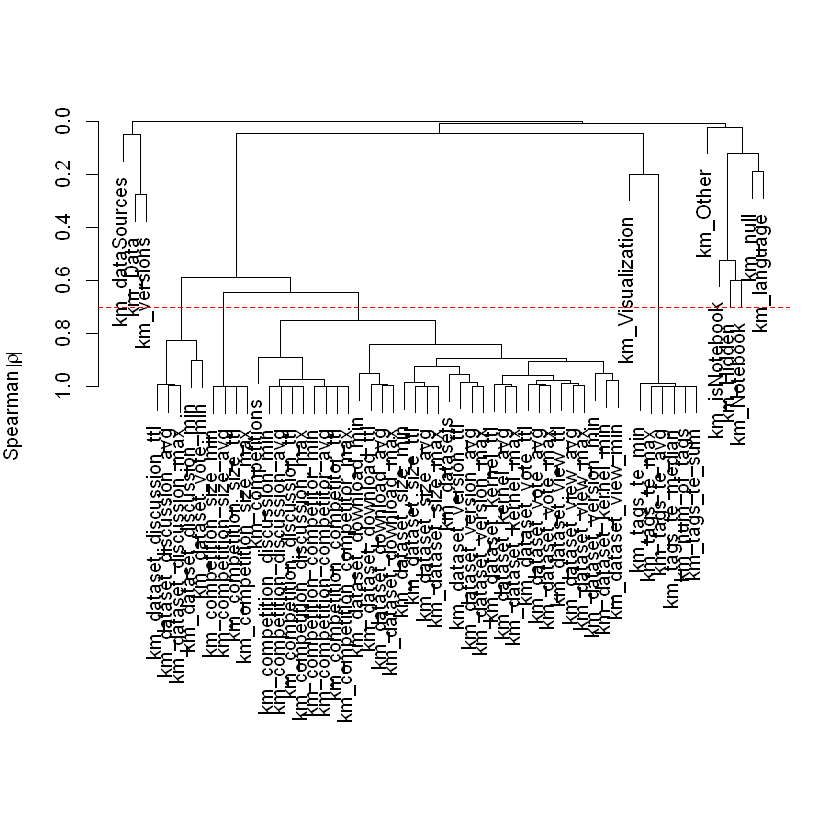

In [4]:
vcobj = varclus(~ ., 
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation.pdf", width = 15, height = 15)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
# reject_vars <- c()
# env_vars <- env_vars[!(env_vars %in% reject_vars)]

In [5]:
env_vars <- c(
    "km_dataSources", 
    "km_Data", 
    "km_versions", 
    "km_dataset_discussion_avg", 
      "km_competition_size_avg", 
      "km_competition_competitor_avg",
    "km_Visualization", 
      "km_tags_te_avg", 
      "km_Other", 
      "km_isNotebook",
      "km_Hidden",
      "km_Notebook",
      "km_null",
      "km_language"
             )
data <- data[env_vars]

png 
  2

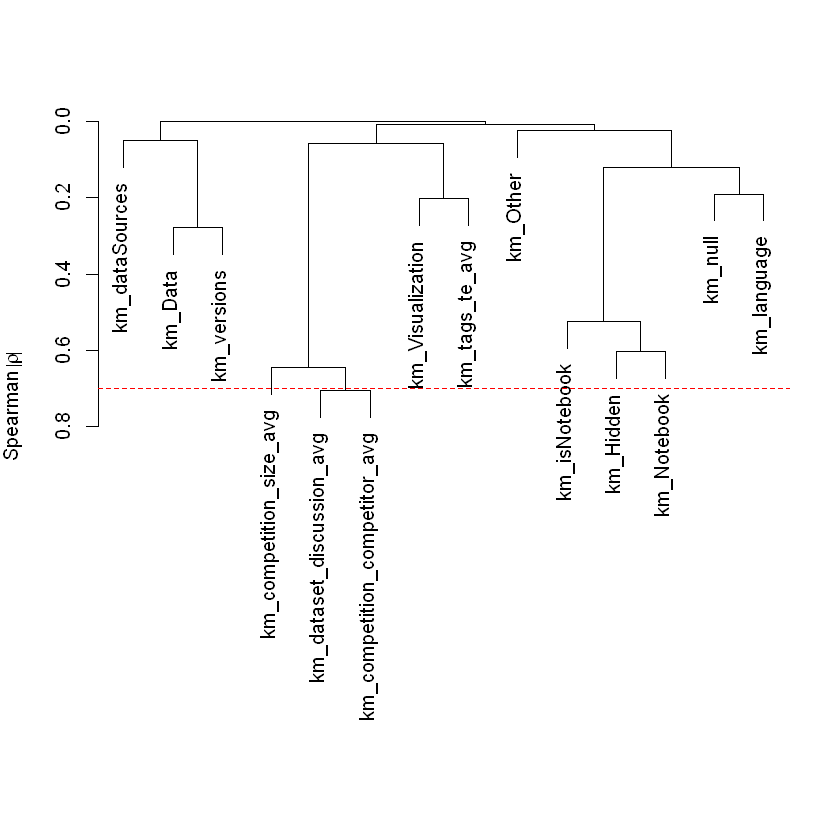

In [6]:
vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation1.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
reject_vars <- c()
env_vars <- env_vars[!(env_vars %in% reject_vars)]

png 
  2

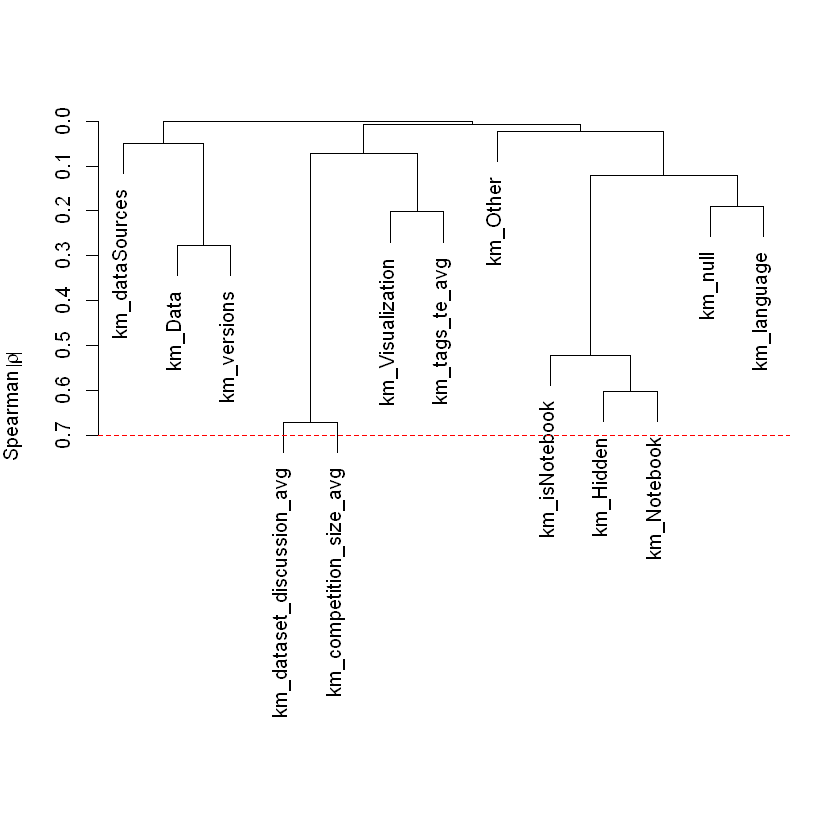

In [7]:
reject_vars <- c("km_competition_competitor_avg")
env_vars <- env_vars[!(env_vars %in% reject_vars)]
data <- data[env_vars]

vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation2.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

## Second Step is to prepare the dataframe, add the voted column back to dataframe. 

random forest model fitting referece: https://www.blopig.com/blog/2017/04/a-very-basic-introduction-to-random-forests-using-r/

### binary classification: 

In [8]:
data_classification = cbind(data, high_voted)

In [9]:
head(data_classification)

km_dataSources,km_Data,km_versions,km_dataset_discussion_avg,km_competition_size_avg,km_Visualization,km_tags_te_avg,km_Other,km_isNotebook,km_Hidden,km_Notebook,km_null,km_language,high_voted
1,1,58,0,2429309862,7,0.57142598,0,0.09271527,2,1,6,0.09296084,True
1,0,2,0,256630325,0,0.07486423,0,0.09271527,1,1,0,0.09296084,True
1,0,1,0,256630325,0,0.07486423,0,0.09271527,1,1,0,0.09296084,True
1,0,5,0,34757,2,0.50374676,0,0.09271527,1,1,0,0.09296084,True
1,0,3,0,256630325,0,0.07486423,0,0.09271527,1,1,0,0.09296084,True
1,1,12,0,256630325,24,0.55366252,0,0.09271527,1,1,0,0.09296084,True


This step is used for generating the binary label. 

In [10]:
summary(data_classification)

 km_dataSources      km_Data          km_versions      
 Min.   : 0.000   Min.   :  0.0000   Min.   :   0.000  
 1st Qu.: 1.000   1st Qu.:  0.0000   1st Qu.:   0.000  
 Median : 1.000   Median :  0.0000   Median :   1.000  
 Mean   : 1.058   Mean   :  0.2447   Mean   :   3.804  
 3rd Qu.: 1.000   3rd Qu.:  0.0000   3rd Qu.:   3.000  
 Max.   :58.000   Max.   :194.0000   Max.   :4046.000  
 km_dataset_discussion_avg km_competition_size_avg km_Visualization  
 Min.   : 0.000            Min.   :0.000e+00       Min.   :    0.00  
 1st Qu.: 0.000            1st Qu.:0.000e+00       1st Qu.:    0.00  
 Median : 0.000            Median :3.476e+04       Median :    0.00  
 Mean   : 3.472            Mean   :7.020e+08       Mean   :    2.86  
 3rd Qu.: 3.000            3rd Qu.:1.605e+07       3rd Qu.:    2.00  
 Max.   :51.000            Max.   :1.026e+11       Max.   :32744.00  
 km_tags_te_avg       km_Other        km_isNotebook       km_Hidden      
 Min.   :0.00000   Min.   :0.00e+00   Min.  

## Then Divide the training and testing data

In [11]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(data_classification))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_classification)), size = smp_size)

train <- data_classification[train_ind, ]
test <- data_classification[-train_ind, ]

Then we fit the model.

In [12]:
#import the package
library(randomForest)
# Perform training:
rf_classifier2 = randomForest(as.factor(high_voted) ~ ., data=train, ntree=100, mtry=2, importance=TRUE)
# because of the as.factor(...), randomforest can fit a classification model. 
rf_classifier2

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = as.factor(high_voted) ~ ., data = train,      ntree = 100, mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 8.57%
Confusion matrix:
       False True class.error
False 131143 1474  0.01111471
True   11180 3929  0.73995632

In [13]:
importance(rf_classifier2)

,False,True,MeanDecreaseAccuracy,MeanDecreaseGini
km_dataSources,16.421420,10.0911707,18.320465,221.36253
km_Data,8.450156,9.2879615,13.396462,265.36119
km_versions,5.216135,32.9509224,21.103875,2770.53684
km_dataset_discussion_avg,8.446492,5.9842484,11.692126,348.50853
km_competition_size_avg,10.657572,19.1613621,16.990010,868.81537
km_Visualization,3.162980,17.6040508,17.231091,1096.67234
km_tags_te_avg,19.019851,51.3737734,41.060404,3083.76176
km_Other,6.773698,-0.5303414,6.605427,45.17792
km_isNotebook,8.926555,-3.3842094,9.131592,150.32179
km_Hidden,10.260629,-2.1214371,11.374014,337.55547


In [14]:
pdf(file="importance_for_all_language.pdf", width = 8, height = 8)
varImpPlot(rf_classifier2, type= 1)
thresh = 0.7
dev.off()

png 
  2

This is AUC. If the stackoverflow gave me the right answer. 

In [15]:
# import the library that needed in calculating the AUC. 
library(pROC)
library(ROCR)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [16]:
# https://stackoverflow.com/questions/46776944/how-to-calculate-randomforest-training-auc-in-r
# the train AUC
rf_p_train <- predict(rf_classifier2, type="prob")[,2]
rf_pr_train <- prediction(rf_p_train, train$high_vote)
r_auc_train <- performance(rf_pr_train, measure = "auc")@y.values[[1]] 
r_auc_train

[1] 0.7967841

In [17]:
#https://stats.stackexchange.com/questions/308645/why-does-randomforest-has-higher-test-auc-than-train-auc-is-this-possible
#the test AUC
rf_p_test <- predict(rf_classifier2, type="prob", newdata = test)[,2]
rf_pr_test <- prediction(rf_p_test, test$high_vote)
r_auc_test <- performance(rf_pr_test, measure = "auc")@y.values[[1]] 
r_auc_test

[1] 0.8202376

### Logistic Regression

In [19]:
library(rms)
fit <- lrm(high_voted ~ .,
           data=train, x=T, y=T)

In [20]:
val <- validate(fit, B=1000)
AUC = 0.5 + val[1,1]/2
AUC_optimism_reduced = (0.5 + val[1,5]/2)
AUC_optimism = AUC - AUC_optimism_reduced
print(c("AUC"=AUC,"AUC_optimism"=AUC_optimism))

         AUC AUC_optimism 
0.6434512055 0.0009310391 
